In [1]:

import matplotlib.dates as mdates
import datetime
from tqdm import tqdm
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
#import plotly.graph_objs as go
import plotly.graph_objects as go
cf.go_offline()
cf.set_config_file(offline = True)
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import TimeSeriesSplit 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

In [2]:
ticker = ['ADBE']
len(ticker)

1

In [3]:
df = yf.download(ticker,start = '2010-01-01').dropna()

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,36.650002,37.299999,36.650002,37.090000,37.090000,4710200
2010-01-05,37.040001,37.799999,36.869999,37.700001,37.700001,7108800
2010-01-06,37.330002,37.740002,37.200001,37.619999,37.619999,5336400
2010-01-07,37.410000,37.590000,36.810001,36.889999,36.889999,5576700
2010-01-08,36.750000,36.970001,36.340000,36.689999,36.689999,5429200


# EXPLORATORY DATA ANALYSIS

In [5]:
# Check if there is any missing values
#df.isnull().sum()
df.isnull().values.any()

False

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2884.000000,2884.000000,2884.000000,2884.000000,2884.000000,2.884000e+03
mean,146.940004,148.563013,145.152084,146.981956,146.981956,3.909794e+06
std,138.566875,140.205649,136.623079,138.538259,138.538259,3.742218e+06
min,22.969999,23.360001,22.670000,22.690001,22.690001,5.892000e+05
25%,35.794999,36.077501,35.457500,35.747500,35.747500,2.139050e+06
50%,82.415001,83.910000,81.879997,83.099998,83.099998,2.999500e+06
75%,243.144997,245.737499,238.989998,242.410000,242.410000,4.493450e+06
max,554.989990,561.359985,547.229980,556.950012,556.950012,1.087524e+08


In [7]:
df_adj_close = df['Adj Close']
df_adj_close = df_adj_close.to_frame()
df_adj_close.columns = [ticker[0]]

In [8]:
df_adj_close.head()

,ADBE
Date,
2010-01-04,37.090000
2010-01-05,37.700001
2010-01-06,37.619999
2010-01-07,36.889999
2010-01-08,36.689999


In [9]:
df_adj_close.iplot(title = 'Price Change between 2010 and 2021')

In [10]:
#Calculate daily return change
ret = df_adj_close.pct_change()
ret.iplot(colors = 'Blue',title = 'Daily Return Between 2010 and 2021')

In [11]:
#This function is calculated annual risk and return for stocks
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

In [12]:
summary = ann_risk_return(ret)
summary

,Return,Risk
ADBE,0.281979,0.303103


In [13]:
stocks_monthly_price = df_adj_close.resample('M',kind='period').last()
ret_month = stocks_monthly_price.pct_change().dropna()
month_cum_ret = (1+ret_month).cumprod()
month_cum_ret.iplot(color = 'Red')

# Moving Average Comparison for 50,100,200 days


In [14]:
def cal_sma50_sma100_sma200(df):
    stocks_SMA= pd.DataFrame()
    for stock in df.columns:
        stocks_SMA['{}'.format(stock)] = df[stock]
        stocks_SMA["{} SMA50".format(stock)]=df[stock].rolling(window = 50).mean()
        stocks_SMA["{} SMA100".format(stock)]=df[stock].rolling(window = 100).mean()
        stocks_SMA["{} SMA200".format(stock)]=df[stock].rolling(window = 200).mean()
    return stocks_SMA

cal_sma50_sma100_sma200(df_adj_close)

,ADBE,ADBE SMA50,ADBE SMA100,ADBE SMA200
Date,,,,
2010-01-04,37.090000,NaN,NaN,NaN
2010-01-05,37.700001,NaN,NaN,NaN
2010-01-06,37.619999,NaN,NaN,NaN
2010-01-07,36.889999,NaN,NaN,NaN
2010-01-08,36.689999,NaN,NaN,NaN
...,...,...,...,...
2021-06-11,541.260010,501.371202,483.855602,483.849201
2021-06-14,556.950012,502.843403,484.727802,483.991501
2021-06-15,548.460022,503.980203,485.492202,484.182201


In [15]:
cal_sma50_sma100_sma200(df_adj_close)

,ADBE,ADBE SMA50,ADBE SMA100,ADBE SMA200
Date,,,,
2010-01-04,37.090000,NaN,NaN,NaN
2010-01-05,37.700001,NaN,NaN,NaN
2010-01-06,37.619999,NaN,NaN,NaN
2010-01-07,36.889999,NaN,NaN,NaN
2010-01-08,36.689999,NaN,NaN,NaN
...,...,...,...,...
2021-06-11,541.260010,501.371202,483.855602,483.849201
2021-06-14,556.950012,502.843403,484.727802,483.991501
2021-06-15,548.460022,503.980203,485.492202,484.182201


In [16]:
moving_avg = cal_sma50_sma100_sma200(df_adj_close)
moving_avg.iplot(title = 'Comparison the moving averages')

# Annual Return Triangle



In [17]:
annual = df_adj_close.resample("A", kind = "period").last()
annual

,ADBE
Date,
2010,30.780001
2011,28.270000
2012,37.680000
2013,59.880001
2014,72.699997
2015,93.940002
2016,102.949997
2017,175.240005
2018,226.240005


In [18]:
annual_log_ret = np.log(annual/annual.shift())
annual_log_ret.dropna(inplace = True)
years = annual_log_ret.index.size

In [19]:
def annual_return_triangle(df,annual_log_ret):
    windows = [year for year in range(years, 0, -1)]
    for i in df.columns:
        for year in windows:
            annual_log_ret["{}{}Y".format(i,year)] = annual_log_ret[i].rolling(year).mean()
    return annual_log_ret
   

In [20]:
an_ret_tri = annual_return_triangle(df_adj_close,annual_log_ret)

In [21]:
triangle= an_ret_tri.drop(columns = df_adj_close.columns)
triangle.columns

Index(['ADBE11Y', 'ADBE10Y', 'ADBE9Y', 'ADBE8Y', 'ADBE7Y', 'ADBE6Y', 'ADBE5Y',
       'ADBE4Y', 'ADBE3Y', 'ADBE2Y', 'ADBE1Y'],
      dtype='object')

In [22]:
triangle

,ADBE11Y,ADBE10Y,ADBE9Y,ADBE8Y,ADBE7Y,ADBE6Y,ADBE5Y,ADBE4Y,ADBE3Y,ADBE2Y,ADBE1Y
Date,,,,,,,,,,,
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.085064
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.101132,0.287328
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.221826,0.375271,0.463213
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214869,0.314847,0.328606,0.193999
2015,NaN,NaN,NaN,NaN,NaN,NaN,0.223158,0.300214,0.304509,0.225157,0.256315
2016,NaN,NaN,NaN,NaN,NaN,0.201230,0.258488,0.251278,0.180634,0.173951,0.091587
2017,NaN,NaN,NaN,NaN,0.248470,0.304059,0.307405,0.268453,0.293272,0.311750,0.531913
2018,NaN,NaN,NaN,0.249341,0.297114,0.298744,0.265851,0.283814,0.292980,0.393677,0.255440
2019,NaN,NaN,0.263517,0.307089,0.309912,0.284362,0.302435,0.313965,0.388091,0.316180,0.376920


In [23]:
def graph_annual_return_triangle(df):
    i=0
    new_list=[]
    while i<len(triangle.columns.values):
        new_list.append(df.columns.values[i:i+years])
        i+=years

    for i in new_list:
        plt.figure(figsize=(30,20))
        sns.set(font_scale=2)
        sns.heatmap(df[i], annot = True, fmt = ".1%", cmap = "RdYlGn")
        plt.tick_params(axis = "y", labelright =True)
    return plt.show()

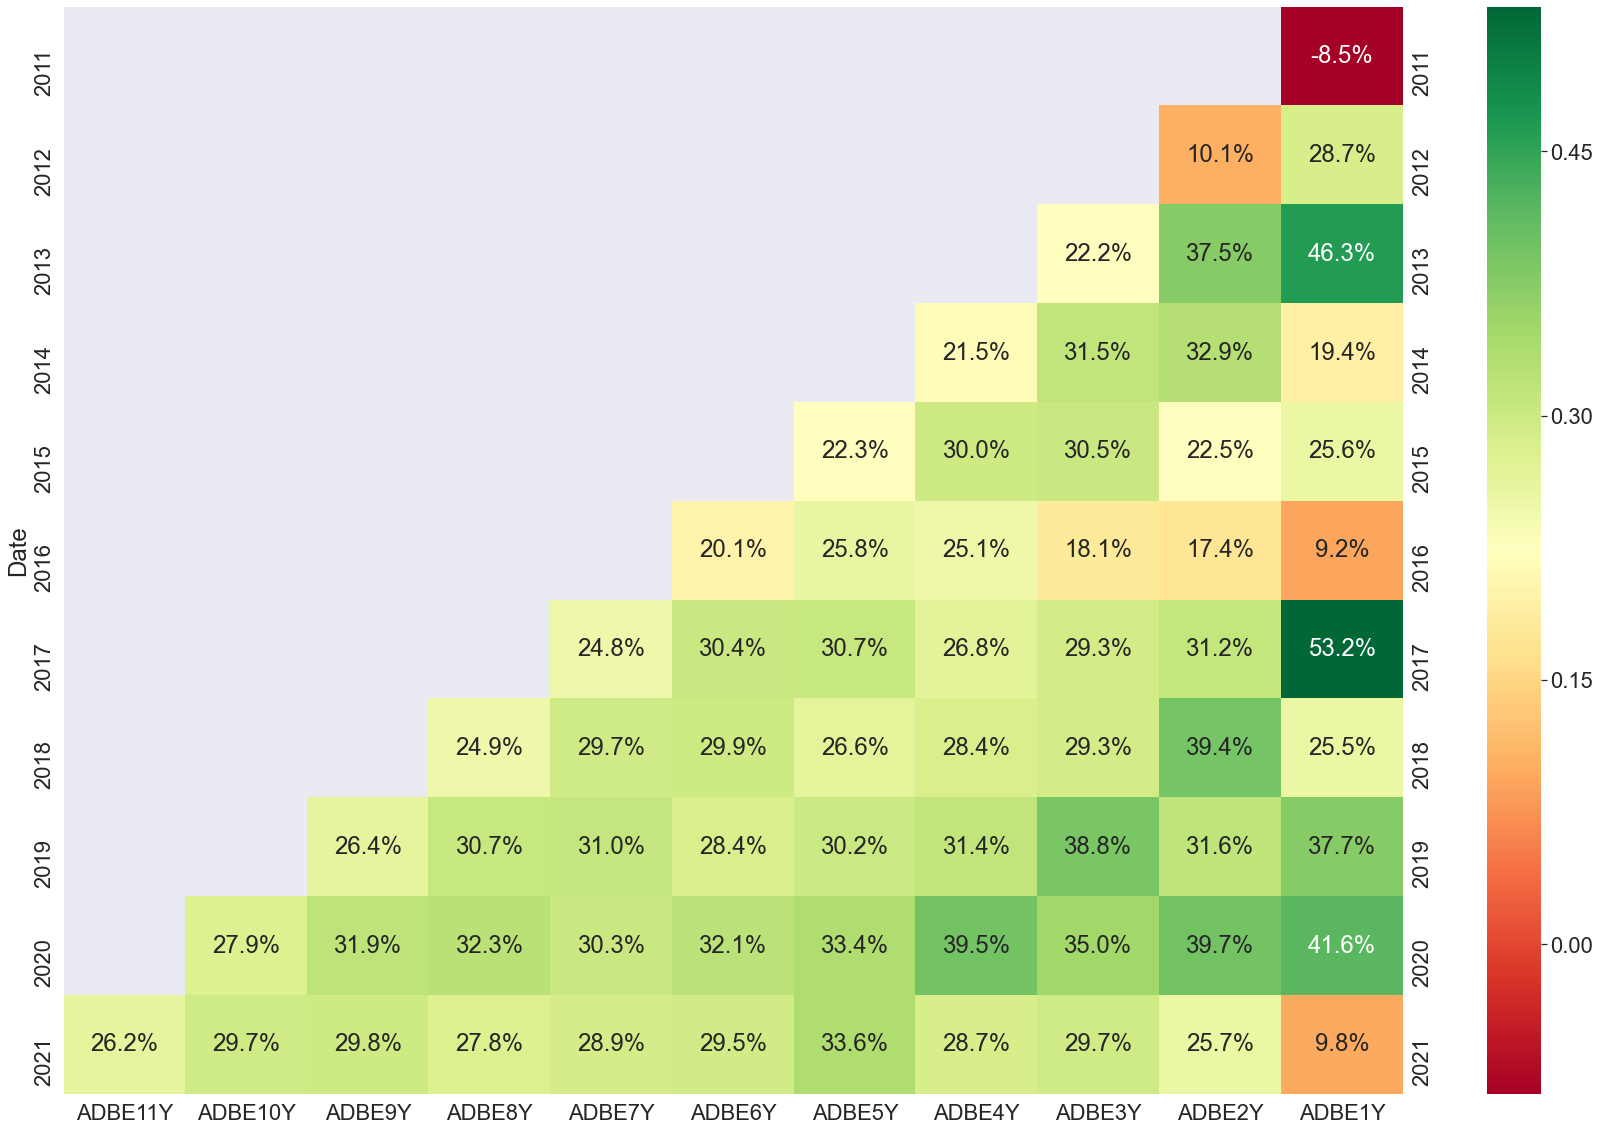

In [24]:
graph_annual_return_triangle(triangle)

# MACHINE LEARNING ALGORITMS

# DATA PREPERATION 

# 1-  Normalize the Data

In [25]:
# First thing we need to do is to normalize the data with sklearn's MinMaxScaler function. We created a function for it.
# The data will be scaled between 0 - 1

def normalize_featuresDF(df):
    """
    We created to normalize df data - range between 0-1
    args:
        df : the data we pulled up from yahoo for the stock
    return:
        normalized_features_df : data after it is normalized
    
    """
    scaler = MinMaxScaler()
    feature_columns = df.columns
    feature_minmax_data = scaler.fit_transform(df)
    normalized_features_df = pd.DataFrame(columns=feature_columns, data=feature_minmax_data, index=df.index)
    
    
    return normalized_features_df

# 2- Split the data into Train, Test and Validation sets

In [26]:
def split_ValidationSet(features_df, target_df, length=90):
    """
    method is to separate validation set from the complete df
    args:
        features_df: full features_df
        target_df :  full target_df
        length: prediction length
    returns : 
        validation_x : returns features validations sets
        validation_y : returns target validations sets
    """
    #need to shift target array because we are prediction n + 1 days price
    target_df = target_df.shift(-1)
    #split validation set . i am spliting 10% latest data for validation.
    #target
    validation_y = target_df[-length:-1]
    validation_x = features_df[-length:-1]
    
    return validation_x, validation_y

#Now get final_features_df and final_target_df by excluding validation set
def split_Final_df(normalized_features_df, target_df, v_length=90):
    """
    This method will be having remaining data after the validation set.
    args:
        features_df: normalized features_df
        target_df: complete target_df
        v_length: validation set length
    return: 
        final_features_df : set of feature df excluding validation set
        final_target_df : set of target df excluding validation set
    """
    final_features_df = normalized_features_df[:-v_length]
    final_target_df = target_df[:-v_length]
    
    return final_features_df, final_target_df

# 3 - Train and Test split  - Timeseries split

In [27]:
#Split final set into training and testing sets
#splitting training and testing set using sklearn's TimeSeries split
def split_Train_Test_DF(final_features_df, final_target_df, n_splits=10):
    """
    Using sklearn's timeseries split to split the training and testing sets
    args:
        final_features_df: features_df after splitting validation set
        final_target_df: target_df after splitting validation set
    
    return: 
        x_train : traing feature set
        y_train : training target set
        x_test : testing feature set
        y_test : testing target set
    """
    ts_split = TimeSeriesSplit(n_splits)
    for train_index, test_index in ts_split.split(final_features_df):
        x_train, x_test = final_features_df[:len(train_index)], final_features_df[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = final_target_df[:len(train_index)].values.ravel(), final_target_df[len(train_index): (len(train_index)+len(test_index))].values.ravel()
        
    return x_train, y_train, x_test, y_test

# 4-  Visualizing the datasets

In [28]:

def DataSet_Graph():
    """
    
    Chart shows 2 different sets(Train,Test,Validation) into single plot
    Since it is time series data, it shouldnot be mixed 
    """
    t=y_test.astype(np.float)
    v = target_df[-90:-1].values.ravel()
    plt.figure(figsize = (20,10))
    plt.plot(y_train, label='trainning_set')
    plt.plot([None]*len(y_train) + [x for x in t], label='test_set')
    plt.plot([None]*(len(y_train)+len(t)) + [x for x in v], label='validation_set')
    plt.xlabel('Days',fontsize = 18)
    plt.ylabel('Price',fontsize = 18)
    plt.title('Split dataset into training/validation/test set',fontsize = 20)
    plt.legend()

# 5 - Implementing model prediction and evaluation

## Method for validating result with evaluation metrics

In [69]:

#Method to evaluate the benchmark model and solution model with validate data set
def model_validateResult(model, model_name):
    """
    Returns RMSE_Score and R2_Score
    Also plots actual vs predicted trend
    args:
        model : the model is to validate
        model_name: name of the model
    return:
        RMSE_Score : calculates rmse score
        R2_Score : calculates R2 score
    """

    model = model(x_train, y_train, validation_x)
    prediction = model.predict(validation_x)
    RMSE_Score = np.sqrt(mean_squared_error(validation_y, prediction))
    R2_Score = r2_score(validation_y, prediction)
    
    #trendline for actual vs prediction

    plt.figure(figsize = (23,10))
    plt.plot(validation_y.index, prediction, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='green', markersize=8,label = 'Prediction data')
    plt.plot(validation_y.index, validation_y, color='red', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='red', markersize=8,label = 'Actual data')
    plt.plot(figsize = (23,10))
    plt.ylabel('Price',fontsize = 20)
    plt.xlabel('Date',fontsize = 20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual',fontsize = 20)
    plt.legend(loc='upper left')
    plt.show()
    print(model_name + ' RMSE: ', RMSE_Score)
    print(model_name + ' R2 score: ', R2_Score)
    return RMSE_Score, R2_Score




#Method to evaluate the final model with testing data set
def bestModel_validateResult(model, model_name):
    """
    Returns RMSE_Score and R2_Score
    Also plots actual vs predicted trend
    args:
        model : the model is to validate
        model_name: name of the model
    return:
        RMSE_Score : calculates rmse score
        R2_Score : calculates R2 score
    """ 
    #I am giving testing set for the evaluation 
    model = model(x_train, y_train, x_test)
    prediction = model.predict(x_test)
    
    RMSE_Score = np.sqrt(mean_squared_error(y_test, prediction))
    R2_Score = r2_score(y_test, prediction)
    plt.figure(figsize = (23,10))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(model_name + 'Prediction Vs Actual',fontsize = 20)
    plt.plot(y_test, label='test data')
    plt.plot(prediction, label='prediction')
    plt.xlabel('Days',fontsize = 20)
    plt.ylabel('Price',fontsize = 20)
    plt.legend();
    print(model_name + ' RMSE: ', RMSE_Score)
    print(model_name + ' R2 score: ', R2_Score) 
    return RMSE_Score, R2_Score



def value_Compare(model):
    """
    this method is used to create final data frame using testing value with predicted value.
    args:
        model : trained model
    return : 
        df : df with test value and predicted value
    """
    model = model(x_train, y_train, x_test)
    prediction = model.predict(x_test)
    col1 = pd.DataFrame(y_test, columns=['True_value'])
    col2 = pd.DataFrame(prediction, columns = ['Predicted_value'])
    df = pd.concat([col1, col2], axis=1)
    return df

# 6- Build Models with functions

## Decision Tree Regressor(DTR)

In [30]:

#modeling DecisionTreeRegressor with default parameters

def model_Decision_Tree_Regressor(x_train, y_train,validation_x, random_state=0):
    """
    Method is to model DecisionTreeRegressor
    args:
        x_train : feature training set
        y_train : target training set
        validation_x : validation feature set
        random_state : default parameter it controls the randomness of the estimater
    
    return: 
        model : returns the trained model
        
    """
    #initialize DTR
    dtr = DecisionTreeRegressor(random_state=0)   
    #fit the data
    model = dtr.fit(x_train, y_train)
    
    return model



## Support Vector Regressor(SVR)

In [31]:
def model_SVR(x_train, y_train, validation_x):
    
    """
    This method uses svr algorithm to trian the data.
    args:
        x_train : feature training set
        y_train : target training set
        validation_x : validation feature set
    return:
        model : returns the trained model
    """
    svr_model = SVR(kernel='linear')
    model = svr_model.fit(x_train, y_train)
    return model

def model_SVRTuning(x_train, y_train, validation_x):
    """
    This method uses svr algorithm to trian the data.
    Using different set of C and epsilon.
    Using GridSearchCV to select best hyperparameters
    args:
        x_train : feature training set
        y_train : target training set
        validation_x : validation feature set
    return:
        model : returns the trained model
    """
    hyperparameters_linearSVR = {
        'C':[0.5, 1.0, 10.0, 50.0, 100.0, 120.0,150.0, 300.0, 500.0,700.0,800.0, 1000.0],
        'epsilon':[0, 0.1, 0.5, 0.7, 0.9],
    }
    
    grid_search_SVR_feat = GridSearchCV(estimator=model_SVR(x_train, y_train, validation_x),
                           param_grid=hyperparameters_linearSVR,
                           cv=TimeSeriesSplit(n_splits=10),
    )

    model = grid_search_SVR_feat.fit(x_train, y_train)
    #print(grid_search_SVR_feat.best_params_)
    
    return model

## Lasso and Ridge

In [32]:

def model_Lasso(x_train, y_train, validation_x):
     """
    This method uses  train the data.
    args:
        x_train : feature training set
        y_train : target training set
        validation_x : validation feature set
    return:
        model : returns the trained model
    """
    lasso_clf = LassoCV(n_alphas=1000, max_iter=3000, random_state=0)
    model = lasso_clf.fit(x_train,y_train)
#     prediction = model.predict(validation_x)
    return model


def model_Ridge(x_train, y_train, validation_x):
     """
    This method uses to train the data.
    args:
        x_train : feature training set
        y_train : target training set
        validation_x : validation feature set
    return:
        model : returns the trained model
    """
    ridge_clf = RidgeCV(gcv_mode='auto')
    model = ridge_clf.fit(x_train,y_train)
#     prediction = ridge_model.predict(validation_x)
    return model


# Stochastic Gradient Descent (SGD)

In [33]:
def Stochastic_Gradient_Descent_model(x_train,y_train,validation_x):
    """
    This method uses to train the data.
    args:
        x_train : feature training set
        y_train : target training set
        validation_x : validation feature set
    return:
        model : returns the trained model
    """
    
    sgd =SGDRegressor(max_iter=1000, tol=1e-3,loss='squared_epsilon_insensitive',penalty='l1',alpha=0.1)
    model = sgd.fit(x_train,y_train)
#     prediction = model.predict(validation_x)
    return model

# 7- Implimentation

## Selecting features df and target df

## Normalizing the data

In [34]:
#normalizing features df
normalized_features_df = normalize_featuresDF(df)
target_df = df[['Adj Close']]

In [35]:
#Get shape of the features and target data
print("feature_df has (rows, columns) : {} ".format(normalized_features_df.shape))
print("target_df has (rows, columns) : {} ".format(target_df.shape))


feature_df has (rows, columns) : (2884, 6) 
target_df has (rows, columns) : (2884, 1) 


In [36]:
normalized_features_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,0.025713,0.025911,0.026651,0.026953,0.026953,0.038100
2010-01-05,0.026446,0.026840,0.027070,0.028095,0.028095,0.060276
2010-01-06,0.026991,0.026729,0.027699,0.027945,0.027945,0.043889
2010-01-07,0.027142,0.026450,0.026956,0.026579,0.026579,0.046111
2010-01-08,0.025901,0.025297,0.026060,0.026204,0.026204,0.044747
...,...,...,...,...,...,...
2021-06-11,0.952558,0.963736,0.966677,0.970632,0.970632,0.021068
2021-06-14,0.981298,1.000000,0.992413,1.000000,1.000000,0.027120
2021-06-15,1.000000,0.988178,1.000000,0.984109,0.984109,0.016971


In [37]:
target_df

,Adj Close
Date,
2010-01-04,37.090000
2010-01-05,37.700001
2010-01-06,37.619999
2010-01-07,36.889999
2010-01-08,36.689999
...,...
2021-06-11,541.260010
2021-06-14,556.950012
2021-06-15,548.460022


## Splitting train, test, validation sets

In [38]:
#Splitting validation sets from the final features and target df
validation_x, validation_y = split_ValidationSet(normalized_features_df, target_df)

In [39]:
print("validation_x has (rows, columns) : {} ".format(validation_x.shape))
print("validation_y has (rows, columns) : {} ".format(validation_y.shape))

validation_x has (rows, columns) : (89, 6) 
validation_y has (rows, columns) : (89, 1) 


In [40]:

#splitting train and test set from validation set

final_features_df, final_target_df = split_Final_df(normalized_features_df, target_df)

In [41]:
print("final_features_df has (rows, columns) : {} ".format(final_features_df.shape))
print("final_target_df has (rows, columns) : {} ".format(final_target_df.shape))

final_features_df has (rows, columns) : (2794, 6) 
final_target_df has (rows, columns) : (2794, 1) 


## Splitting Train and Test using Skleans TimeSeriesSplit

In [42]:
#splitting train and test
x_train, y_train, x_test, y_test = split_Train_Test_DF(final_features_df, final_target_df)

In [43]:
print("Shape of training sets x_train : {}, y_train : {}".format(x_train.shape, y_train.shape))
print("Shape of testing sets x_train : {}, y_train : {}".format(x_test.shape, y_test.shape))

Shape of training sets x_train : (2540, 6), y_train : (2540,)
Shape of testing sets x_train : (254, 6), y_train : (254,)


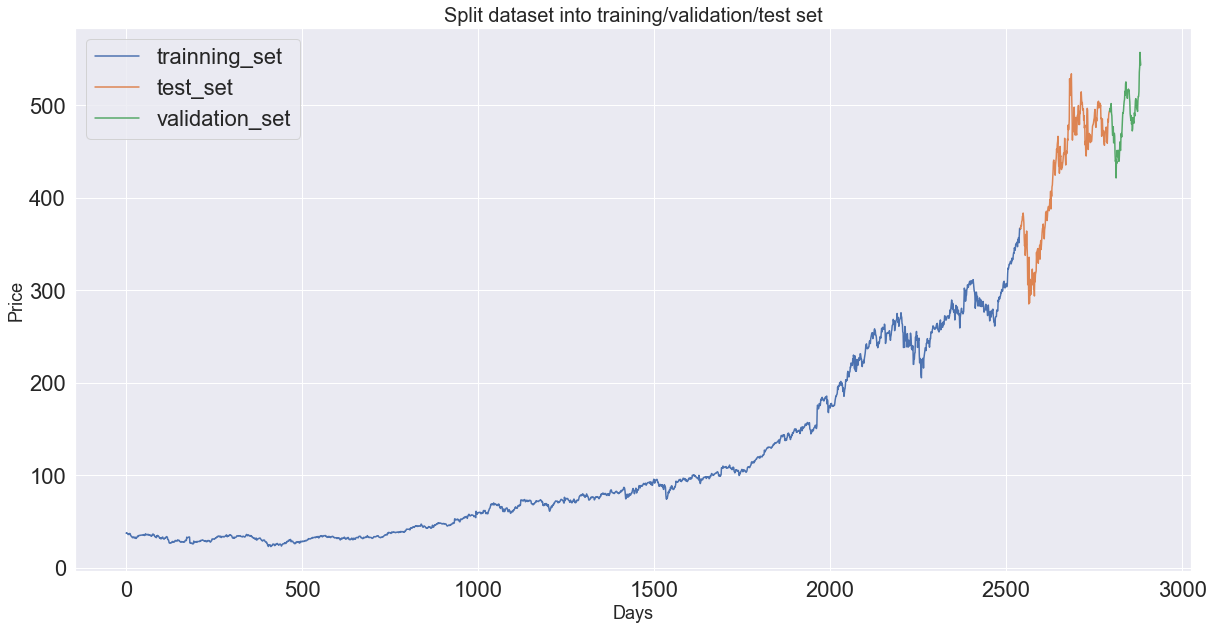

In [44]:

#Visualizing the train, test and validation sets in single plot
#Starbucks
DataSet_Graph()

# 9- Model Validation

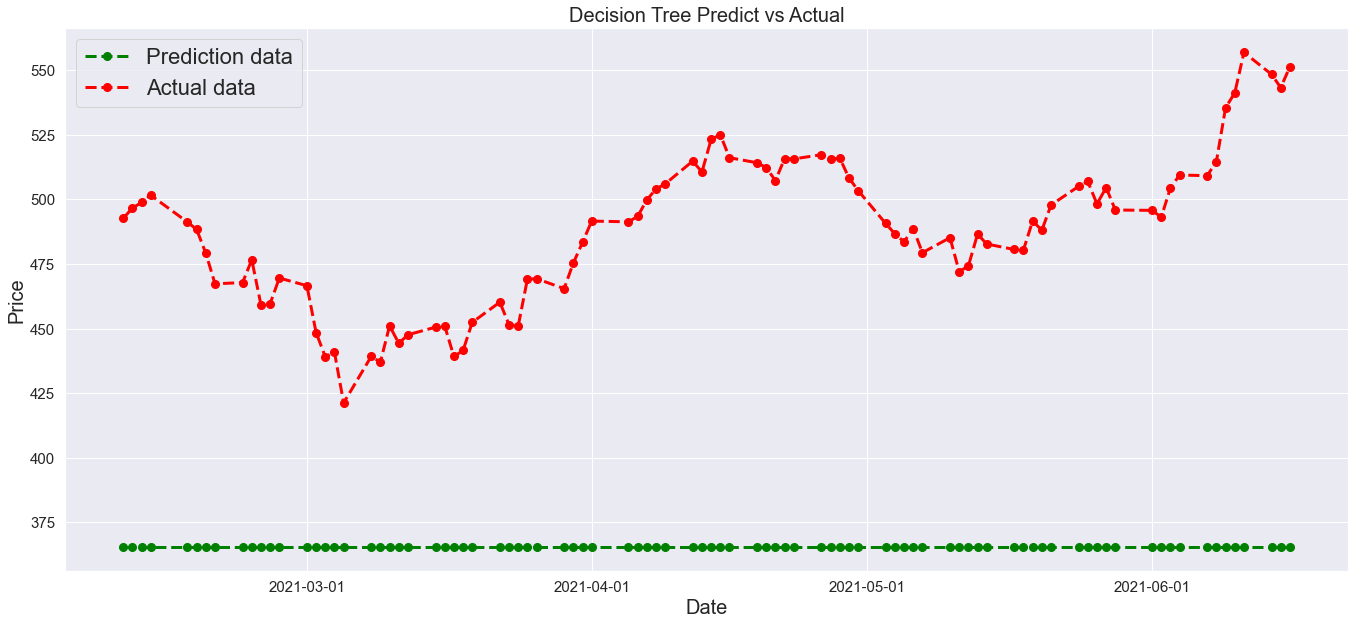

Decision Tree RMSE:  125.76865408168423
Decision Tree R2 score:  -18.02110531944326


In [70]:
# Getting the RMSE and R2 score by predicting the model.
# DTR model RMSE and R2 score with plot
RMSE_Score, R2_Score = model_validateResult(model_Decision_Tree_Regressor, model_name = "Decision Tree")

# Solution Model Validation

# SVR Model

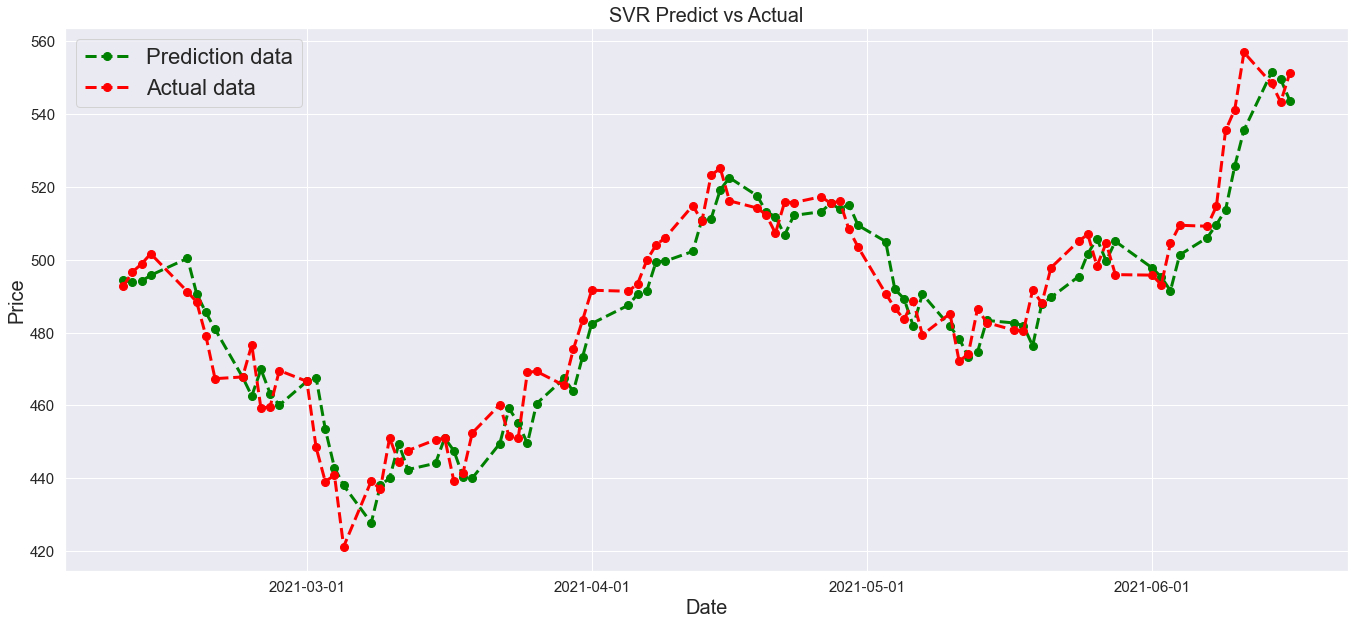

SVR RMSE:  8.710942417563006
SVR R2 score:  0.908752450637751


In [71]:

#SVR model
RMSE_Score, R2_Score = model_validateResult(model_SVR, model_name = "SVR")

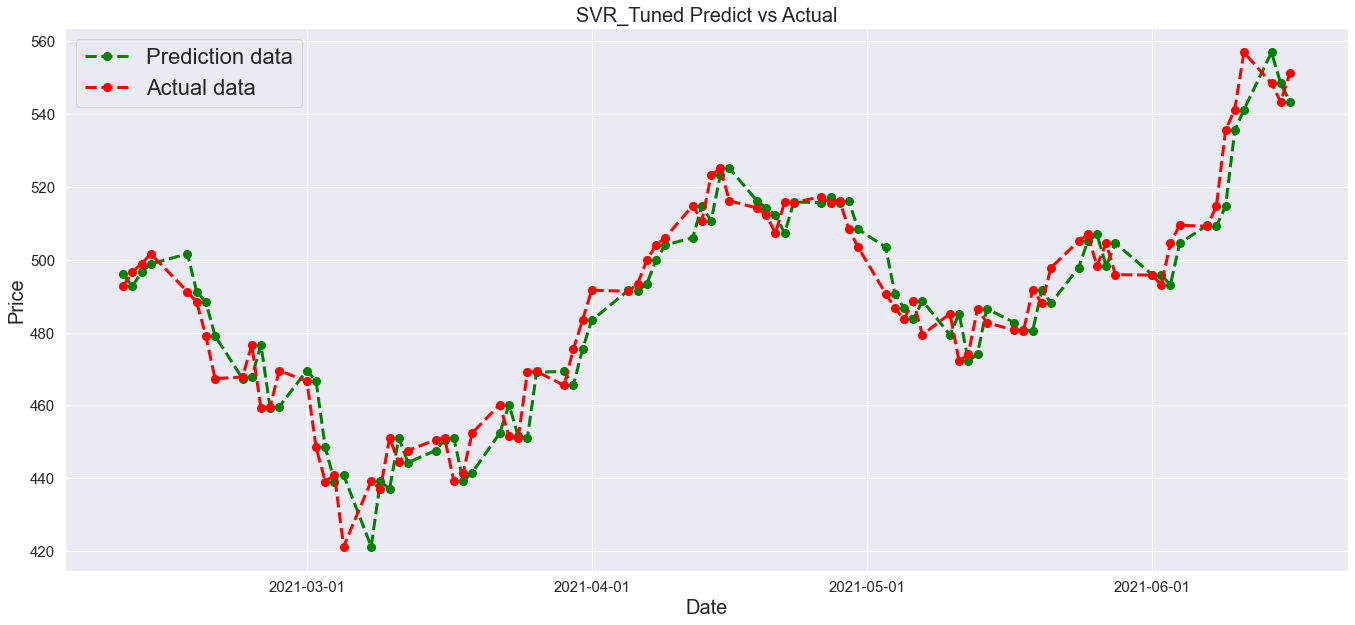

SVR_Tuned RMSE:  8.26162724758947
SVR_Tuned R2 score:  0.9179228786336315


In [72]:
#SVR model Tuning
RMSE_Score, R2_Score = model_validateResult(model_SVRTuning, model_name = "SVR_Tuned")

# Lasso and Ridge Model

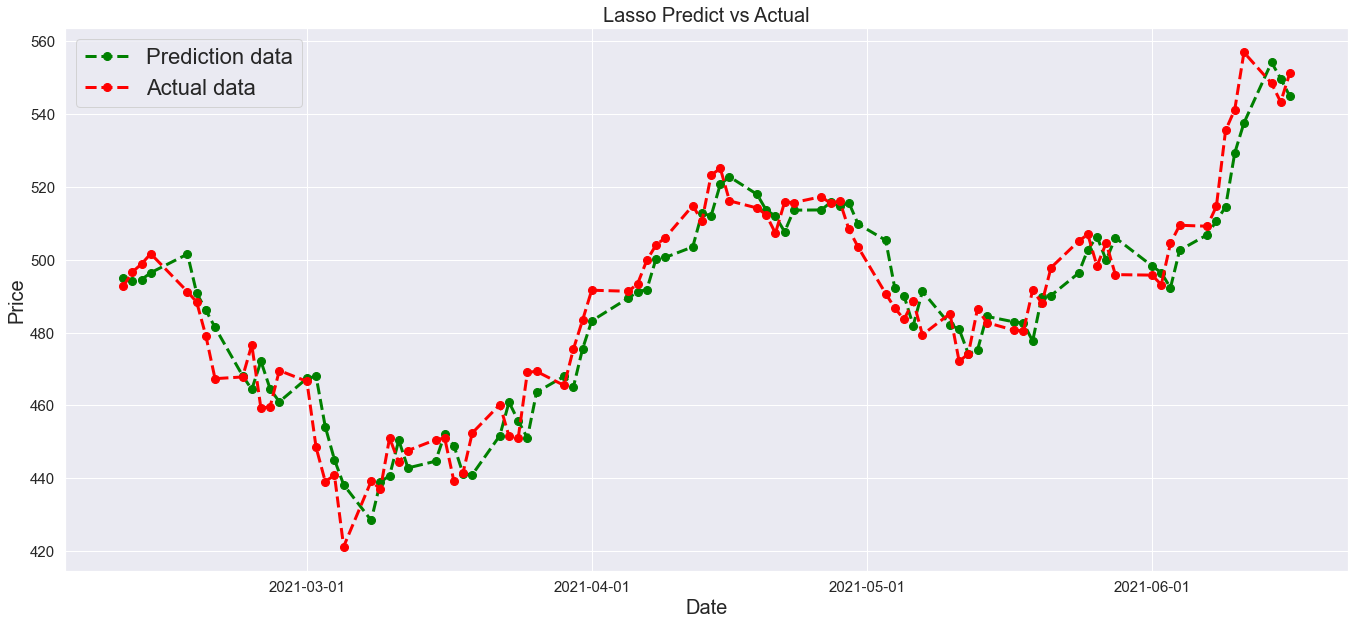

Lasso RMSE:  8.41270342503971
Lasso R2 score:  0.9148936272064425


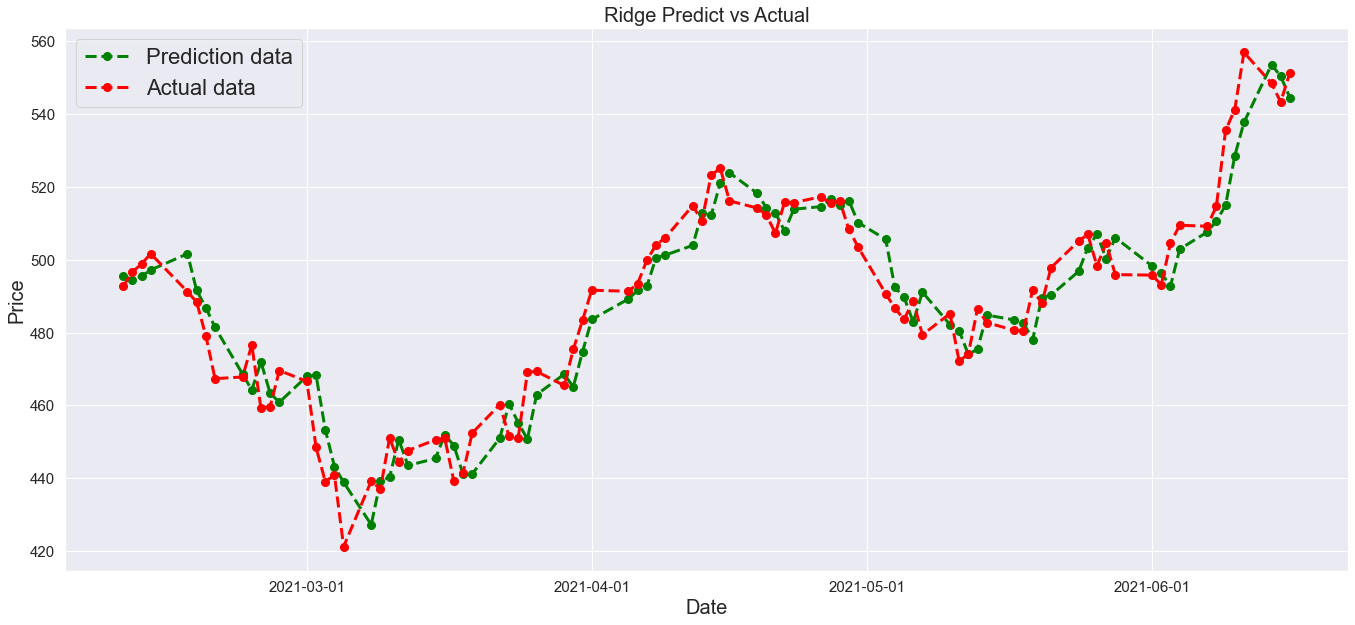

Ridge RMSE:  8.403866900407934
Ridge R2 score:  0.9150723211543296


In [73]:
RMSE_Score, R2_Score = model_validateResult(model_Lasso, model_name = "Lasso")
RMSE_Score, R2_Score = model_validateResult(model_Ridge, model_name = "Ridge")

# Stochastic Gradient Descent model

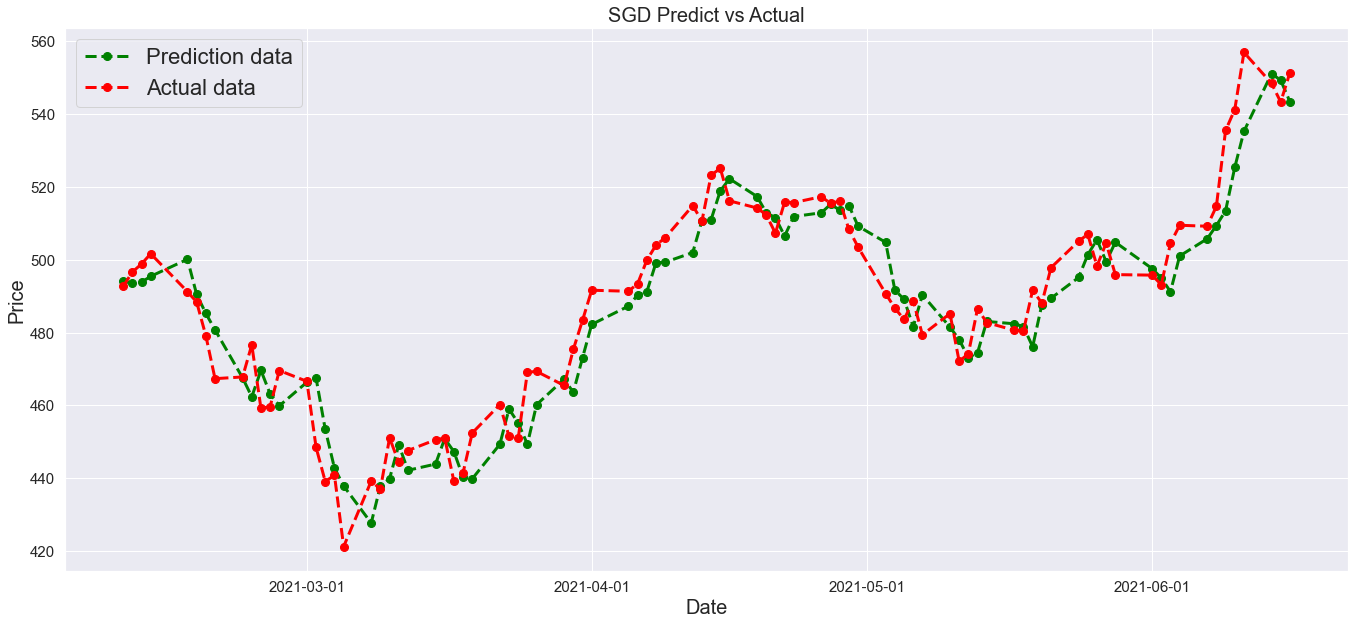

SGD RMSE:  8.775251748477345
SGD R2 score:  0.9074001906082796


In [74]:
RMSE_Score, R2_Score = model_validateResult(Stochastic_Gradient_Descent_model, model_name = "SGD")
#Stochastic_Gradient_Descent_model

# Which one is the Best Model?

In [50]:


def ValidationDataResult(model, model_name):
    """
    Returns RMSE_Score and R2_Score
    Also plots actual vs predicted trend
    args:
        model : it takes the model to validate
        model_name: give the model name
    return:
        RMSE_Score : calculates rmse score
        R2_Score : calculates R2 score
    """
    model = model(x_train, y_train, validation_x)
    prediction = model.predict(validation_x)
    
    RMSE_Score = np.sqrt(mean_squared_error(validation_y, prediction))
    
    R2_Score = r2_score(validation_y, prediction)
    
    model_validation = {model_name:[RMSE_Score,R2_Score]}
    return model_validation


################################################################################


#Method to evaluate the final model with testing data set
def TestDataResult(model, model_name):
    """
    Returns RMSE_Score and R2_Score
    Also plots actual vs predicted trend
    USing testing data set for evaluation
    args:
        model : it takes the model to validate
        model_name: give the model name
    return:
        RMSE_Score : calculates rmse score
        R2_Score : calculates R2 score
    """
    
    #I am giving testing set for the evaluation 
    model = model(x_train, y_train, x_test)
    prediction = model.predict(x_test)
    
    RMSE_Score = np.sqrt(mean_squared_error(y_test, prediction))
    
    R2_Score = r2_score(y_test, prediction)
    
    model_validation_test_data = {model_name:[RMSE_Score,R2_Score]}
    
    return model_validation_test_data


In [51]:

import warnings
warnings.filterwarnings('ignore')

model_list = {'Decision_Tree': model_Decision_Tree_Regressor,'SVR': model_SVR,
              'SVR_Tuning':model_SVRTuning, 'Lasso':model_Lasso,'Ridge':model_Ridge,
              'Stockhastic_Gradient':Stochastic_Gradient_Descent_model}


ValidationData_RMSE_R2_Score = []
TestData_RMSE_R2_Score = []


for key, value in model_list.items():
    all_model_val = ValidationDataResult(model = value, model_name = key)
    ValidationData_RMSE_R2_Score.append(all_model_val)
print('Validation Data Result : ',ValidationData_RMSE_R2_Score)



for key, value in model_list.items():
    all_model_val_test = TestDataResult(model = value, model_name = key)
    TestData_RMSE_R2_Score.append(all_model_val_test)
print('Test Data Result : ', TestData_RMSE_R2_Score)

Validation Data Result :  [{'Decision_Tree': [125.76865408168423, -18.02110531944326]}, {'SVR': [8.710942417563006, 0.908752450637751]}, {'SVR_Tuning': [8.26162724758947, 0.9179228786336315]}, {'Lasso': [8.41270342503971, 0.9148936272064425]}, {'Ridge': [8.403866900407934, 0.9150723211543296]}, {'Stockhastic_Gradient': [8.759225239189698, 0.9077381174423707]}]
Test Data Result :  [{'Decision_Tree': [87.38400210628073, -0.8730502200334631]}, {'SVR': [3.6670394662511705, 0.9967014981829097]}, {'SVR_Tuning': [0.0007631356292930177, 0.9999999998571472]}, {'Lasso': [3.198664726307914, 0.9974902931166032]}, {'Ridge': [2.875670675338048, 0.997971552102178]}, {'Stockhastic_Gradient': [3.750301351976545, 0.9965500095532758]}]


In [52]:
RMSE_ValidationData,R2_Score_ValidationData,models_ValidationData = [],[],[]

for i in ValidationData_RMSE_R2_Score:
    for key,value in i.items():
        RMSE_ValidationData.append(value[0])
        R2_Score_ValidationData.append(value[1])
        models_ValidationData.append(key)
        


RMSE_TestData,R2_Score_TestData,models_TestData= [],[],[]

for i in TestData_RMSE_R2_Score:
    for key,value in i.items():
        RMSE_TestData.append(value[0])
        R2_Score_TestData.append(value[1])
        models_TestData.append(key)

    
    
Validation_Model_List = pd.DataFrame(np.column_stack([RMSE_ValidationData,R2_Score_ValidationData]), index = models_ValidationData,columns = ['RMSE','R2_Score'] )
Test_Model_List = pd.DataFrame(np.column_stack([RMSE_TestData,R2_Score_TestData]), index = models_TestData,columns = ['RMSE','R2_Score'] )

In [53]:
Validation_Model_List

,RMSE,R2_Score
Decision_Tree,125.768654,-18.021105
SVR,8.710942,0.908752
SVR_Tuning,8.261627,0.917923
Lasso,8.412703,0.914894
Ridge,8.403867,0.915072
Stockhastic_Gradient,8.759225,0.907738


In [54]:
Test_Model_List

,RMSE,R2_Score
Decision_Tree,87.384002,-0.873050
SVR,3.667039,0.996701
SVR_Tuning,0.000763,1.000000
Lasso,3.198665,0.997490
Ridge,2.875671,0.997972
Stockhastic_Gradient,3.750301,0.996550


In [55]:

# We select lowest RMSE and Highest R2_Score to select best Model.All results indicate SVR_Tuning is the best model.
print('Min RMSE for Validation DataSet : ', Validation_Model_List['RMSE'].idxmin(),'\nMax R2_Score for Validation DataSet : ',Validation_Model_List['R2_Score'].idxmax())
print('Min RMSE for Test DataSet: ',Test_Model_List['RMSE'].idxmin(),'\nMax R2_Score for Test DataSet : ',Test_Model_List['R2_Score'].idxmax())

Min RMSE for Validation DataSet :  SVR_Tuning 
Max R2_Score for Validation DataSet :  SVR_Tuning
Min RMSE for Test DataSet:  SVR_Tuning 
Max R2_Score for Test DataSet :  SVR_Tuning



# SVM_Tuning

SVR_Best Model  RMSE:  0.0007631356292930177
SVR_Best Model  R2 score:  0.9999999998571472


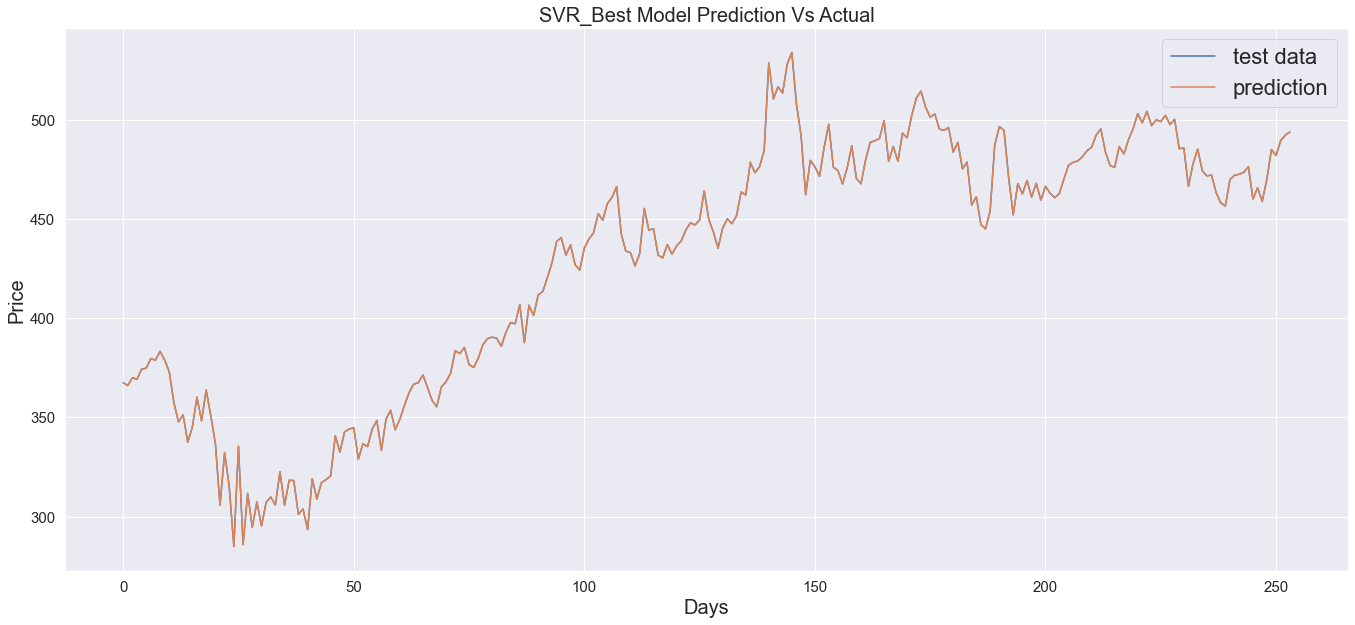

In [56]:
#Based on the RSME Scroe and R2 Score, I am selecting SVM with tuned model as best model for this. 
#Below I am going predict the value with test df

#SVR_Tuning model validation with test data
RMSE_Score, R2_Score = bestModel_validateResult(model_SVRTuning, model_name = "SVR_Best Model ")

In [57]:
#SVM_Tuned model actual vs prected value
prediction_df = value_Compare(model_SVRTuning)
display(prediction_df.tail(40))

,True_value,Predicted_value
214,476.869995,476.869288
215,475.910004,475.909100
216,486.420013,486.419041
217,482.640015,482.639168
218,489.899994,489.898994
219,495.359985,495.358977
220,502.950012,502.949001
221,498.390015,498.389064
222,504.170013,504.169013
223,496.910004,496.909151


In [58]:
prediction_df.iplot()